In [5]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib as plt

import shapely
import shapely.wkt

In [2]:
dir_path = "train/labels/"
training_labels = os.listdir(dir_path)
sample = training_labels[0:10]

In [3]:
import cv2
from PIL import Image
from IPython.display import display

from IPython.display import Image as iimage


def see_photo(name): 

    p = 'train/images/'
    display(iimage(filename=p + name.split(".json")[0] + ".png"))

def view_seg(name): 

    alpha = 0.3 # that's your transparency factor
    path_image = 'train/images/' + name.split(".json")[0] + ".png"
    path_json = 'train/labels/' + name

    d = pd.read_json(path_json)
    xy = d['features']['xy']
    
    if xy != None and len(xy) > 0: 
        p = d['features']['xy'][0]['wkt']
        polygon = shapely.wkt.loads(p)
        int_coords = lambda x: np.array(x).round().astype(np.int32)
        exterior = [int_coords(polygon.exterior.coords)]

        image = cv2.imread(path_image)
        overlay = image.copy()
        cv2.fillPoly(overlay, exterior, color=(255, 255, 0))
        cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0, image)
        # cv2.imshow("Polygon", image)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

        display(Image.fromarray(image))
    else: 
        see_photo(name)
        

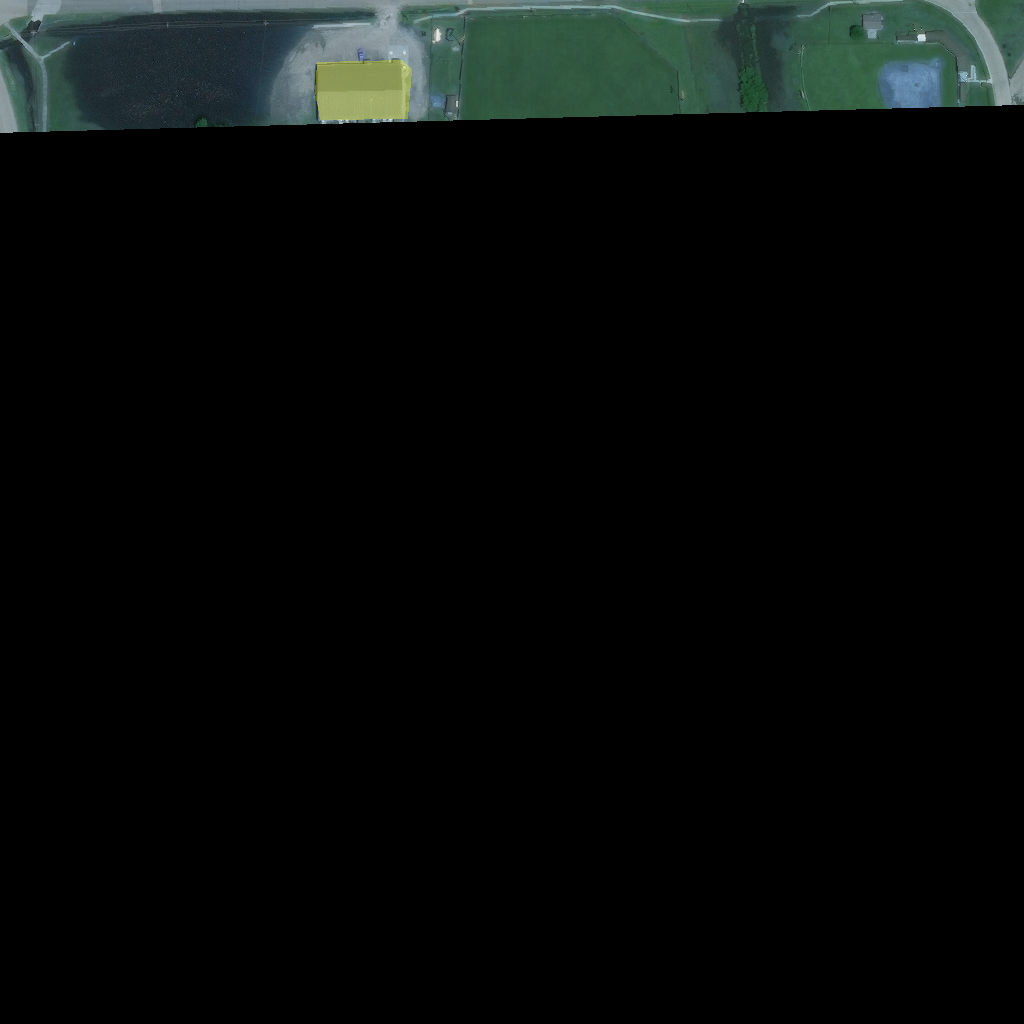

In [6]:
view_seg(sample[1])

In [61]:
def export_building(name, uid, polygon): 
    # Extract the point values that define the perimeter of the polygon
    polygon = shapely.wkt.loads(polygon)
    x, y = polygon.exterior.coords.xy

    bbox = {
        'x_min': round(min(x.tolist())), 
        'x_max': round(max(x.tolist())), 
        'y_min': round(min(y.tolist())), 
        'y_max': round(max(y.tolist()))
    }

    image = cv2.imread("train/images/" + name.split(".json")[0] + ".png")
    display(Image.fromarray(image[bbox['y_min']:bbox['y_max'], bbox['x_min']:bbox['x_max']]))

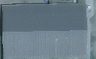

In [62]:
d = pd.read_json('train/labels/' + sample[1])
poly = d['features']['xy'][0]['wkt']

export_building(sample[1], 'filler', poly)